# Линейная корреляция между всеми столбцами

Значения близкие к +1 и -1 показывают наличие корреляции

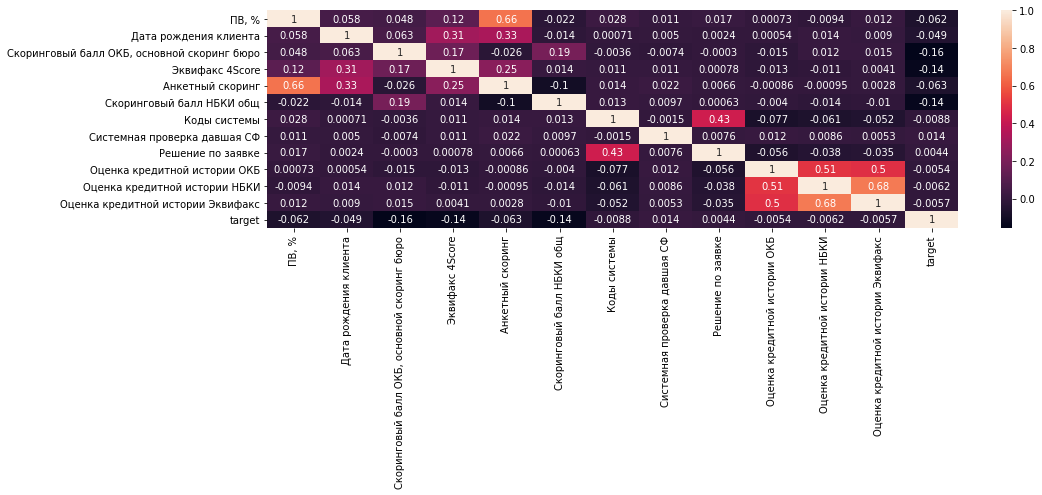

In [11]:
p = 'encoded.pickle'
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(df.corr(), annot=True, )
plt.subplots_adjust(right=2, left=0)
plt.show()

# Нелинейрая корреляция к цели

## Зеленая зона выданных кредитов

In [2]:
from evseeva import feature_importance_forest, get1, get2, get3
p = 'encoded.pickle'
df = get1(p)
feature_importance_forest(df)

Feature ranking:
(12,)
1. Эквифакс 4Score (0.350120)
2. Скоринговый балл ОКБ, основной скоринг бюро (0.220303)
3. Скоринговый балл НБКИ общ (0.194890)
4. ПВ, % (0.140306)
5. Анкетный скоринг (0.063046)
6. Дата рождения клиента (0.018105)
7. Коды системы (0.005299)
8. Оценка кредитной истории Эквифакс (0.002869)
9. Оценка кредитной истории ОКБ (0.002551)
10. Оценка кредитной истории НБКИ (0.001523)
11. Решение по заявке (0.000760)
12. Системная проверка давшая СФ (0.000228)


## Серая зона выданных кредитов

In [3]:
from evseeva import feature_importance_forest, get1, get2, get3
p = 'encoded.pickle'
df = get2(p)
feature_importance_forest(df)

Feature ranking:
(12,)
1. Скоринговый балл ОКБ, основной скоринг бюро (0.525013)
2. Скоринговый балл НБКИ общ (0.225251)
3. Эквифакс 4Score (0.067370)
4. Анкетный скоринг (0.049798)
5. ПВ, % (0.027168)
6. Коды системы (0.027010)
7. Оценка кредитной истории Эквифакс (0.019732)
8. Оценка кредитной истории ОКБ (0.019422)
9. Дата рождения клиента (0.019258)
10. Оценка кредитной истории НБКИ (0.017292)
11. Решение по заявке (0.001608)
12. Системная проверка давшая СФ (0.001077)


## Красная зона выданных кредитов

In [4]:
from evseeva import feature_importance_forest, get1, get2, get3
p = 'encoded.pickle'
df = get3(p)
feature_importance_forest(df)

Feature ranking:
(12,)
1. Скоринговый балл ОКБ, основной скоринг бюро (0.425045)
2. Скоринговый балл НБКИ общ (0.267233)
3. Эквифакс 4Score (0.170948)
4. ПВ, % (0.054328)
5. Анкетный скоринг (0.033280)
6. Дата рождения клиента (0.013486)
7. Оценка кредитной истории ОКБ (0.009523)
8. Оценка кредитной истории Эквифакс (0.009093)
9. Коды системы (0.008572)
10. Оценка кредитной истории НБКИ (0.008103)
11. Системная проверка давшая СФ (0.000314)
12. Решение по заявке (0.000075)


# Для того чтобы иметь возможность выдать кредиты заявкам из серой зоны мы должны построить модель предсказывающую их и понять ключевые факторы способствующие выявлению таких заявок.

## Корреляция комбинаций столбцов для серой зоны

In [1]:
from evseeva import feature_importance_forest, get1, get2, get3
import pandas as pd
p = 'feature_eng.pickle'
df: pd.DataFrame = pd.read_pickle(p)
feature_importance_forest(df, max_depth=2, max_leaf_nodes=10, n_estimators=5)

Feature ranking:
(210,)
1. Скоринговый балл ОКБ, основной скоринг бюро / Эквифакс 4Score (0.608420)
2. Оценка кредитной истории Эквифакс + Скоринговый балл ОКБ, основной скоринг бюро (0.472856)
3. Анкетный скоринг + Скоринговый балл ОКБ, основной скоринг бюро (0.437260)
4. Скоринговый балл НБКИ общ + Скоринговый балл ОКБ, основной скоринг бюро (0.407858)
5. Коды системы + Скоринговый балл ОКБ, основной скоринг бюро (0.397603)
6. Эквифакс 4Score / Скоринговый балл ОКБ, основной скоринг бюро (0.385160)
7. Оценка кредитной истории ОКБ + Скоринговый балл ОКБ, основной скоринг бюро (0.380403)
8. Решение по заявке + Скоринговый балл ОКБ, основной скоринг бюро (0.371851)
9. Скоринговый балл ОКБ, основной скоринг бюро (0.347751)
10. ПВ, % + Скоринговый балл ОКБ, основной скоринг бюро (0.347725)


## Интерпритация лучшей модели

Можно предположить, что имеют смысл следующие новые поля:

Скоринговый балл ОКБ, основной скоринг бюро / Эквифакс 4Score

Оценка кредитной истории Эквифакс + Скоринговый балл ОКБ, основной скоринг бюро + Анкетный скоринг + Скоринговый балл НБКИ общ

0:[Скоринговый балл ОКБ, основной скоринг бюро<863] yes=1,no=2,missing=1
	1:[Анкетный скоринг<71] yes=3,no=4,missing=3
		3:[Дата рождения клиента<33] yes=7,no=8,missing=7
			7:leaf=-0.0276730694
			8:leaf=-0.345091045
		4:[ПВ, %<11] yes=9,no=10,missing=9
			9:leaf=-0.031252265
			10:leaf=-0.147350773
	2:[Скоринговый балл ОКБ, основной скоринг бюро<1090] yes=5,no=6,missing=5
		5:[Эквифакс 4Score<548] yes=11,no=12,missing=11
			11:leaf=-0.509815454
			12:leaf=0.0811731145
		6:[Эквифакс 4Score<621] yes=13,no=14,missing=13
			13:leaf=-0.601617992
			14:leaf=-0.10269662



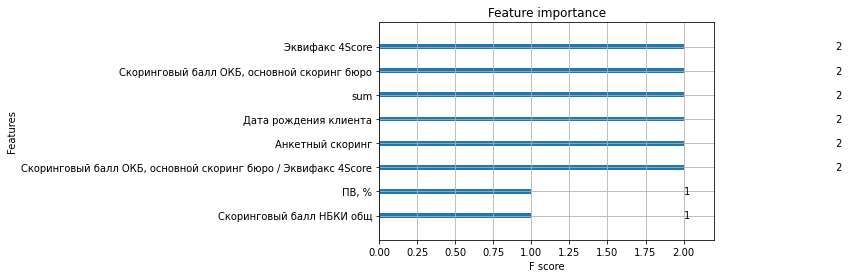

In [3]:
import numpy as np
from evseeva import feature_importance_xgboost, get1, get2, get3
p = 'encoded.pickle'
df = get2(p)
df['Скоринговый балл ОКБ, основной скоринг бюро / Эквифакс 4Score'] = \
        df['Скоринговый балл ОКБ, основной скоринг бюро'] / df['Эквифакс 4Score']
df.replace([-np.inf], 0, inplace=True)
df.replace([np.inf], 999999999, inplace=True)
df['sum'] = df['Оценка кредитной истории Эквифакс'] + df['Скоринговый балл ОКБ, основной скоринг бюро'] + \
                df['Анкетный скоринг'] + df['Скоринговый балл НБКИ общ']
feature_importance_xgboost(df)

Ключевое условие для признания сделки в серой зоне:

* 'Скоринговый балл ОКБ, основной скоринг бюро' < 1090
* 'Эквифакс 4Score' > 548